# haarcascade_frontalface_default.xml

Using adaboost frontal face detector. Created by Rainer Lienhart.  

### Cascade of Strong Classifiers
http://what-when-how.com/face-recognition/face-detection-face-recognition-techniques-part-3/

In [0]:
#Installing modules we need. And doing it only once.
import pkgutil; 
if not pkgutil.find_loader("missingno"):
  !pip install missingno -q


In [0]:
#importing modules we need 
import os.path
from pathlib import Path
from matplotlib import pyplot as plt


In [0]:
def get_file(url):
  fname = url.split('/')[-1]
  if not Path(fname).exists():
    print("Getting ", fname)
    !wget {url} -q

In [5]:
get_file("https://www.dropbox.com/s/t46jj6vxuu9hipj/obama.png")
get_file("https://www.dropbox.com/s/mq7julne4cudghx/haarcascade_frontalface_default.xml")
get_file("https://www.dropbox.com/s/lytpezxhji23my4/obama2.png")
get_file("https://www.dropbox.com/s/rpuk1odtg5hycjy/messi.png")
get_file("https://www.dropbox.com/s/n59r5nd02dan1a0/messi2.png")


Getting  obama.png
Getting  haarcascade_frontalface_default.xml
Getting  obama2.png
Getting  messi.png
Getting  messi2.png


In [0]:
import cv2
import numpy as np

In [0]:
def imshow(image):
  plt.grid(False)
  if len(image.shape) == 3:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  else:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))


In [9]:
image = cv2.imread("obama.png")
print("height: {} pixels".format(image.shape[0]))
print("width: {} pixels".format(image.shape[1]))
print("channels: {}".format(image.shape[2]))
image.shape

height: 624 pixels
width: 500 pixels
channels: 3


(624, 500, 3)

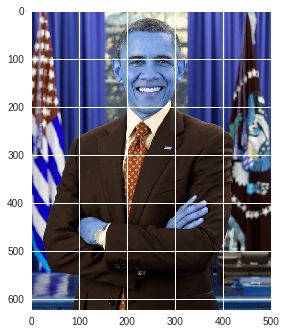

In [10]:
plt.imshow(image)

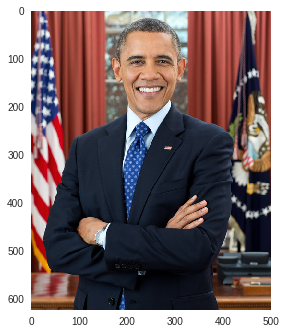

In [11]:
imshow(image)

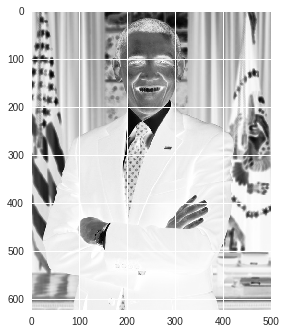

In [12]:
gr_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gr_image)

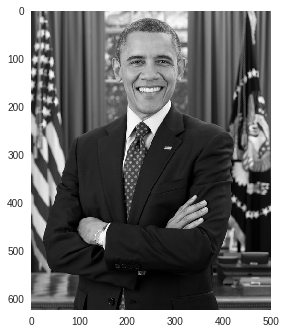

In [13]:
imshow(gr_image)

In [0]:
def detect_face(image, scaleFactor = 1.2, minNeighbors = 5, minSize = (30, 30)):
  get_file("https://www.dropbox.com/s/mq7julne4cudghx/haarcascade_frontalface_default.xml")
  faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
  gr_image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  rects = faceCascade.detectMultiScale(gr_image,
               scaleFactor = scaleFactor,
               minNeighbors = minNeighbors, minSize = minSize,
               flags = cv2.CASCADE_SCALE_IMAGE)
  for (x, y, w, h) in rects:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 5)
  return image

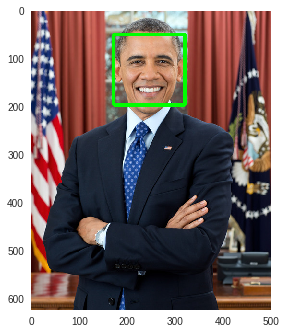

In [16]:
image = cv2.imread("obama.png")
fc_image = detect_face(image,scaleFactor = 1.1, minNeighbors = 5,
                      minSize = (30, 30))

imshow(fc_image)

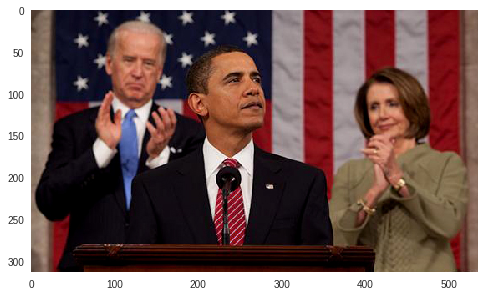

In [17]:
image = cv2.imread("obama2.png")
imshow(image)


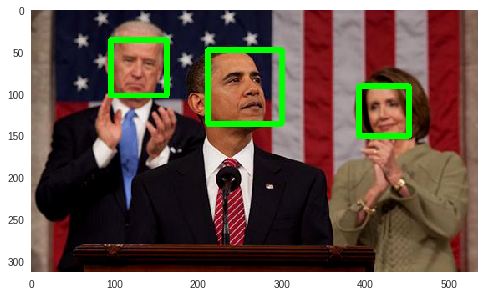

In [17]:
image = cv2.imread("obama2.png")
fc_image = detect_face(image,scaleFactor = 1.1, minNeighbors = 5,
                      minSize = (30, 30))

imshow(fc_image)

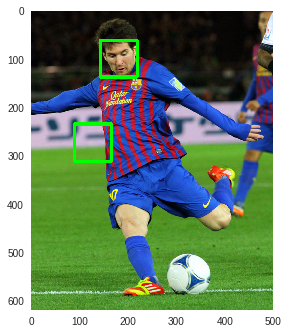

In [18]:
image = cv2.imread("messi2.png")
fc_image = detect_face(image,scaleFactor = 1.1, minNeighbors = 5,
                      minSize = (30, 30))

imshow(fc_image)

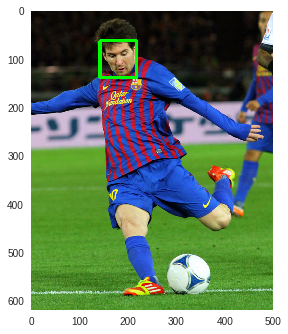

In [19]:
image = cv2.imread("messi2.png")
fc_image = detect_face(image,scaleFactor = 1.2, minNeighbors = 5,
                      minSize = (30, 30))

imshow(fc_image)

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [20]:
get_file("https://www.dropbox.com/s/mjp5vaqe0yoho03/faces.jpeg")

Getting  faces.jpeg


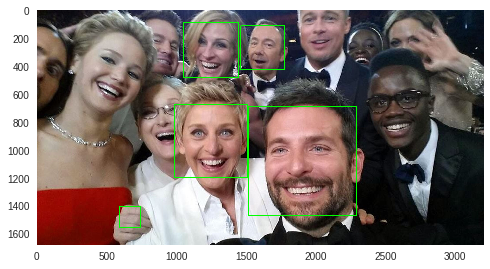

In [21]:
image = cv2.imread("faces.jpeg")
fc_image = detect_face(image,scaleFactor = 1.2, minNeighbors = 5,
                      minSize = (30, 30))

imshow(fc_image)